In [1]:
import anndata as ad
adata = ad.read_h5ad('pbmc.h5ad')
adata.obs

/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


,condition,n_counts,n_genes,mt_frac,cell_type,condition_cell_type
index,,,,,,
AAACATACCAAGCT-1-stimulated,stimulated,1160.0,589,0.0,NK,stimulated_NK
AAACATACCCCTAC-1-stimulated,stimulated,1729.0,795,0.0,Dendritic,stimulated_Dendritic
AAACATACCCGTAA-1-stimulated,stimulated,1360.0,585,0.0,CD4T,stimulated_CD4T
AAACATACCCTCGT-1-stimulated,stimulated,1442.0,732,0.0,B,stimulated_B
AAACATACGAGGTG-1-stimulated,stimulated,1237.0,546,0.0,CD4T,stimulated_CD4T
...,...,...,...,...,...,...
GAGTGTTGCACACA-1-stimulated,stimulated,2409.0,919,0.0,B,stimulated_B
GACCTCACAGATCC-1-control,control,995.0,550,0.0,NK,control_NK
GCGTAATGGGTAAA-1-stimulated,stimulated,1106.0,503,0.0,CD4T,stimulated_CD4T


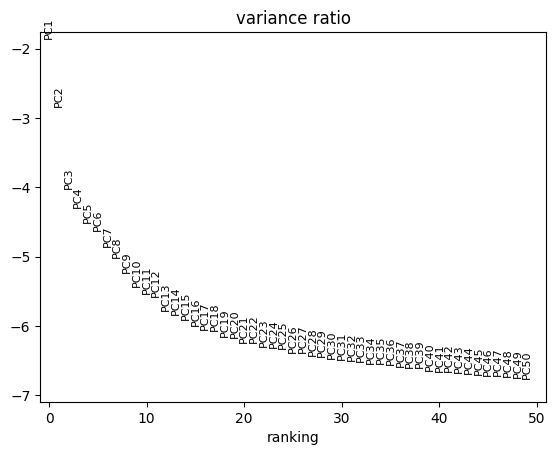

In [2]:
import scanpy as sc
sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 50)

In [3]:
sc.pp.neighbors(adata, n_pcs = 20)
sc.tl.umap(adata)

/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_3287875/727610862.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs = adata.obs.replace('control', 'Control').replace('stimulated', 'Stimulated')


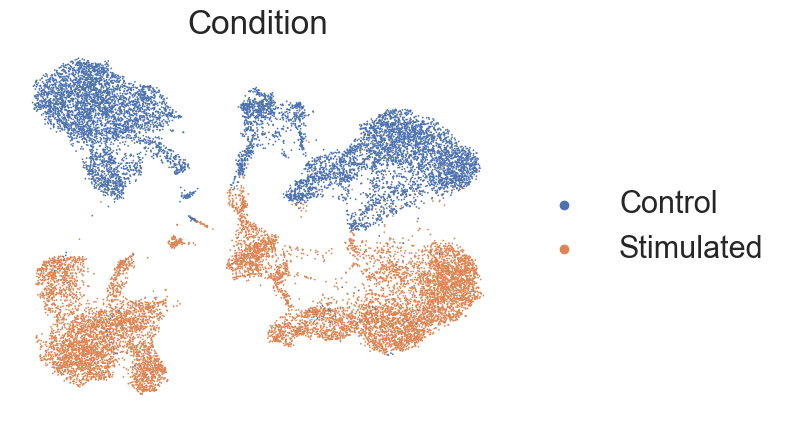

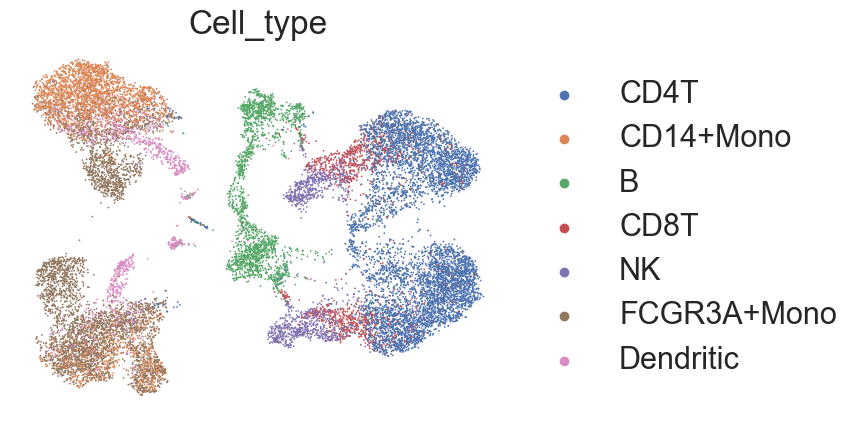

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style = 'white', font = 'Arial', font_scale = 2)
adata.obs = adata.obs.replace('control', 'Control').replace('stimulated', 'Stimulated')
adata.obs.rename(columns = {'condition': 'Condition'}, inplace = True)
adata.obs.rename(columns = {'cell_type': 'Cell_type'}, inplace = True)
sc.pl.umap(adata, color = 'Condition', palette = {
    'Control': sns.color_palette()[0],
    'Stimulated': sns.color_palette()[1],
}, frameon = False)
plt.savefig(f'./umap_cond.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()
sc.pl.umap(adata, color = 'Cell_type', palette = sns.color_palette(), frameon = False)
plt.savefig(f'./umap_cell_type.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()